In [1]:
import os

import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
def readimg(filepath, image_size=(256, 256)):
    image = cv2.imread(filepath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, image_size)
    image = image / 255.0
    
    return image

In [3]:
REPLICAS = 1
label2name = {0: 'Not normal', 1: 'Normal'}

class Parameters:
    height = 256
    width = 256
    image_size = (height, width)
    test_size_split = 0.2
    train_bs = max(32, 8*REPLICAS)
    valid_bs = max(train_bs*2, 8*REPLICAS)
    dropout = 0.5
    epochs = 100
    n_leaf = 16

args = Parameters()

In [4]:
model_filepath = '../models/best_model.h5'
model = tf.keras.models.load_model(model_filepath)

image_folderpath = '../data/raw/demo/'
image_filepaths = [
    image_folderpath + filename 
        for filename in os.listdir(image_folderpath)
]

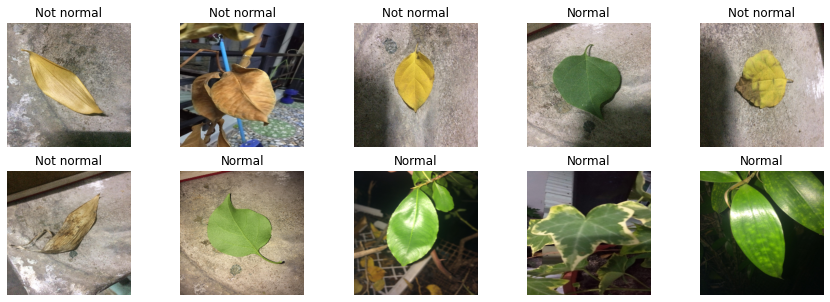

In [5]:
n_col = 5
n_row = round(len(image_filepaths) / n_col)

plt.figure(figsize=(15,5))
for idx, filepath in enumerate(image_filepaths):
    img = readimg(filepath)
    y_pred = model.predict(img[np.newaxis]).round()
    
    plt.subplot(n_row, n_col, idx+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(label2name[y_pred[0][0]])